In [1]:
# output all code in a chunk
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [44]:
# importing required libraries and functions

# data exploration
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualizations
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
import string

# text mining
import re # regular expression
from nltk import word_tokenize, PorterStemmer # natural language toolkit
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
## from sklearn.decomposition import TruncatedSVD

# modeling building
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

# download nltk packages
# nltk.download()

# working directory
import os
print(os.listdir("C:\\Users\\sonuc\\Desktop\\DS Track\\Compeitions\\Toxic Text Classification"))

['.ipynb_checkpoints', 'Notebook v10.ipynb', 'Notebook v11.ipynb', 'Notebook v12 - Kaggle.ipynb', 'Notebook v12.ipynb', 'Notebook v13 with Visualizations.ipynb', 'Notebook v14.ipynb', 'Notebook v15.ipynb', 'Notebook v2.ipynb', 'Notebook v3.ipynb', 'Notebook v4.ipynb', 'Notebook v5.ipynb', 'Notebook v6.ipynb', 'Notebook v7.ipynb', 'Notebook v8.ipynb', 'Notebook v9.ipynb', 'OneLabel v1.ipynb', 'OneLabel v2.ipynb', 'sample_submission.csv', 'sample_submission_csv.zip', 'test.csv', 'test_csv.zip', 'train.csv', 'train_csv.zip', 'Untitled.ipynb']


In [3]:
# reading data
train = pd.read_csv("../Toxic Text Classification/train.csv", nrows = 10000)
test = pd.read_csv("../Toxic Text Classification/test.csv", nrows = 10000)

In [4]:
# data exploration - label counts
x=train.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
#count number of clean entries
train['clean'].sum()
print("Total comments = ",len(train))
print("Total clean comments = ",train['clean'].sum())
print("Total toxic tags =",x.sum())

8970

Total comments =  10000
Total clean comments =  8970
Total toxic tags = 2210


Total comments =  10000

Total clean comments =  8970

Total toxic tags = 2210

Text(0.5,1,'Number per class')

Text(0,0.5,'Number of Occurrences')

Text(0.5,0,'Type of Text ')

Text(0,976,'971.0')

Text(1,106,'101.0')

Text(2,532,'527.0')

Text(3,38,'33.0')

Text(4,499,'494.0')

Text(5,89,'84.0')

Text(6,8975,'8970.0')

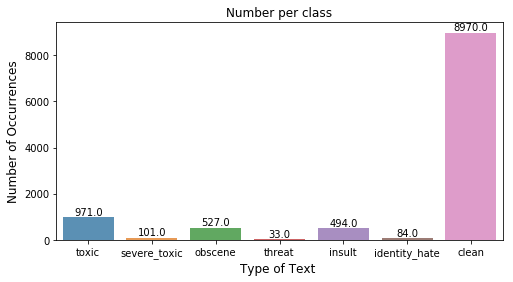

In [5]:
# check class imbalance
x=train.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Number per class")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type of Text ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

Text(0.5,1,'Multiple tags per comment')

Text(0,0.5,'Number of Occurrences')

Text(0.5,0,'Number of tags ')

Text(0,8975,'8970')

Text(1,406,'401')

Text(2,244,'254')

Text(3,259,'239')

Text(4,119,'114')

Text(5,24,'19')

Text(6,8,'3')

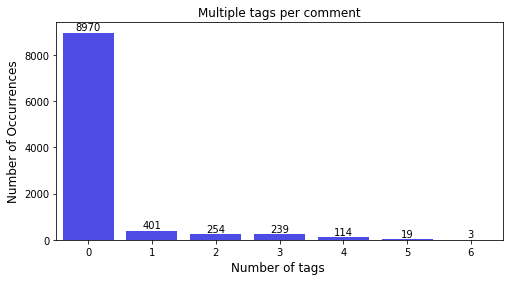

In [6]:
# check multi-tagging situation
x=rowsums.value_counts()

# plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color='blue')
plt.title("Multiple tags per comment")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [7]:
# crosstab/confusion matrix of Toxic comments with the other classes
temp_df=train.iloc[:,2:-1]
# crosstab
# since technically a crosstab between all 6 classes is impossible to vizualize, lets take a look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

out = out.style.apply(highlight_min,axis=0)
out

Text(0.5,1,"Venn diagram for 'toxic', 'insult' and 'obscene'")

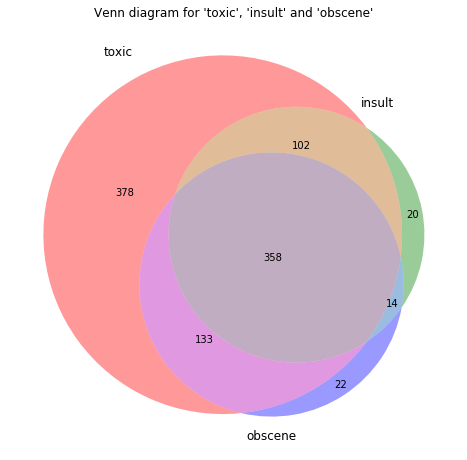

In [8]:
# venn diagram for toxic, obscene,and insult
from matplotlib_venn import venn2
from matplotlib_venn import venn3
t = train[(train['toxic'] == 1) & (train['insult'] == 0) & (train['obscene'] == 0)].shape[0]
i = train[(train['toxic'] == 0) & (train['insult'] == 1) & (train['obscene'] == 0)].shape[0]
o = train[(train['toxic'] == 0) & (train['insult'] == 0) & (train['obscene'] == 1)].shape[0]

t_i = train[(train['toxic'] == 1) & (train['insult'] == 1) & (train['obscene'] == 0)].shape[0]
t_o = train[(train['toxic'] == 1) & (train['insult'] == 0) & (train['obscene'] == 1)].shape[0]
i_o = train[(train['toxic'] == 0) & (train['insult'] == 1) & (train['obscene'] == 1)].shape[0]
t_i_o = train[(train['toxic'] == 1) & (train['insult'] == 1) & (train['obscene'] == 1)].shape[0]


# make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic', 'insult' and 'obscene'")
venn3(subsets = (t, i, t_i, o, t_o, i_o, t_i_o), 
      set_labels=('toxic', 'insult', 'obscene'))
plt.show()

In [9]:
# verifying data
train.comment_text.head()
test.comment_text.head()
len(train)
len(test)

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

0    Yo bitch Ja Rule is more succesful then you'll...
1    == From RfC == \n\n The title is fine as it is...
2    " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3    :If you have a look back at the source, the in...
4            I don't anonymously edit articles at all.
Name: comment_text, dtype: object

10000

10000

In [10]:
# creating train-validation split
X_train, X_val, y_train, y_val = train_test_split(train.comment_text, train.iloc[:,2:8], test_size=0.3, random_state=19)
X_test = test.comment_text

In [11]:
# creating function to normalize text
def normalize(text):
    # recognizing new line characters and tab spaces and substituting it with space
    norm_text = re.sub(r'\n|\t', ' ', text)
    # recognizing time values
    norm_text = re.sub(r'[0-9]{1,2}:[0-9][0-9]', 'time_value', norm_text) # example 5:13pm and 05:13pm
    # recognizing date values
    norm_text = re.sub(r'\d{1,4}[-/]\d{1,2}[-/]\d{1,4}', 'date_value', norm_text) # example 2018-03/05 and 04/03-2018
    norm_text = re.sub(r'[0-9]{1,4}[ ,][A-Za-z]{3,10}[ ,][0-9]{1,4}', 'date_value', norm_text) # example 9 june 2009 and 9 June 2009
    # substitute characters not required by nothing, removing unrequired characters
    norm_text = re.sub(r'[^A-Za-z_ ]', ' ', norm_text)
    # removing multiple space values
    norm_text = re.sub(r' +', ' ', norm_text)
    # removing trailing spaces from front and back and converting all text to lowercase
    norm_text = norm_text.strip().lower()
    return norm_text

In [12]:
# creating stemmer object of PorterStemmer function
stemmer = PorterStemmer()

# writing stem_tokens function to perform stemming on tokens
def stem_tokens(tokens, stemmer): # tokens example: ['today', 'is', 'a', 'good', 'day']
    stemmed = [stemmer.stem(word) for word in tokens]
    return stemmed

In [13]:
# processing text as follows
# tokenize words in each comment
# remove stopwords or words upto lenght of 3 characters
# stem words using the stem_tokens function we created above
def text_process(text): # text is a single sentence; for example: 'today is a good day'
    temp_tokens = word_tokenize(text)

    # using alternative to removing stopwords of english
    ## tokens = [word for word in temp_tokens if len(word) > 3]
    
    # removing english stopwords, code was commented to save computation time
    nostop_tokens = [word for word in temp_tokens if word not in stopwords.words('english')]
    
    stems = stem_tokens(nostop_tokens, stemmer)
    return ' '.join(stems)

In [14]:
# lenght of stopword of english
len(stopwords.words('english'))
stopwords.words('english')[:10]

179

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [15]:
# preparing training text to pass in count vectorizer
corpus = []
for text in X_train:
    text = normalize(text)
    text = text_process(text)
    corpus.append(text)

In [16]:
# build Count Vectorizer, to convert a collection of text documents to a matrix of token counts
count_vect = CountVectorizer(ngram_range=(1,2))
X_train_counts = count_vect.fit_transform(corpus)

In [17]:
# build TFIDF Transformer, to transform a count matrix to a normalized tf or tf-idf representation
# tfidf - term frequency inverse document frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [18]:
# verifing data
# print(X_train_counts.toarray())

In [19]:
# verifing data
# print(X_train_tfidf.toarray())

In [20]:
# checking how much text is transformed
temp = pd.DataFrame({'Before': X_train, 'After': corpus})
print(temp.sample(10))

                                                  After  \
8754  mani biographi wp mention birth date subject m...   
1930  pursuant wikipedia polici biographi live perso...   
3496  prefer summar melton disput interpret quot agr...   
5653  worth page like get delet time wish chang guid...   
3100                                          btw sourc   
4515  whilst agre colonel warden flesh good idea gue...   
7352  cleon ad remark talk page perhap sort cleon od...   
9895                          sonjay dutt deserv better   
8457  potenti show mafioso howev fan club link asu i...   
8196  revers move need new wp rm new discuss want de...   

                                                 Before  
8754  There are many biographies on WP that do not m...  
1930  Pursuant to the Wikipedia's policy on biograph...  
3496  I prefer to summarize Melton, but there was a ...  
5653  For what it's worth, pages like this get delet...  
3100                        BTW, It is sourced, by you.  
45

In [21]:
# preparing validation text to pass in count vectorizer
X_val_set = []
for text in X_val:
    text = normalize(text)
    text = text_process(text)
    X_val_set.append(text)

# tranforming validation data using count vectorizer followed by tfidf transformer
X_val_counts = count_vect.transform(X_val_set)
X_val_tfidf = tfidf_transformer.transform(X_val_counts)

In [22]:
# preparing test text to pass in count vectorizer
X_test_set = []
for text in X_test:
    text = normalize(text)
    text = text_process(text)
    X_test_set.append(text)

# tranforming validation data using count vectorizer followed by tfidf transformer
X_test_counts = count_vect.transform(X_test_set)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [23]:
# Singular Value Decomposition
# Commented as using SVD decreased the estimation score
# build Truncated SVD to reduce the dimensionality

## svd=TruncatedSVD(n_components=100)
## X_train_svd = svd.fit_transform(X_train_tfidf)
## X_val_svd = svd.transform(X_val_tfidf)
## X_test_svd = svd.transform(X_test_tfidf)

In [24]:
# creating dictionary to store prediction results
result_test = dict()
result_val = dict()

In [25]:
# Multinomial Naive Bayes Model
MNB_classifier = OneVsRestClassifier(MultinomialNB())
grid_values = {'estimator__alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]}
MNB_model = GridSearchCV(MNB_classifier, param_grid = grid_values, scoring = 'roc_auc')
MNB_model.fit(X_train_tfidf, y_train)
print('Accurary of Multinomial Naive Bayes Classifier on Training Data: {:.3f}' .format(MNB_model.score(X_train_tfidf, y_train)))
print('Accurary of Multinomial Naive Bayes Classifier on Validation Data: {:.3f}' .format(MNB_model.score(X_val_tfidf, y_val)))
print('Grid best parameter (max. accuracy): ', MNB_model.best_params_)
print('Grid best score (accuracy): ', MNB_model.best_score_)
result_test['Multinomial_NB'] = MNB_model.predict(X_test_tfidf)
result_val['Multinomial_NB'] = MNB_model.predict(X_val_tfidf)

GridSearchCV(cv=None, error_score='raise',
       estimator=OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Accurary of Multinomial Naive Bayes Classifier on Training Data: 1.000
Accurary of Multinomial Naive Bayes Classifier on Validation Data: 0.825
Grid best parameter (max. accuracy):  {'estimator__alpha': 0.1}
Grid best score (accuracy):  0.848985648234


In [26]:
# Multinomial_NB result summary
result_test['Multinomial_NB'].sum(axis=0)

array([376,   0, 133,   0,  53,   0])

In [27]:
# Bernoulli Naive Bayes Model
BNB_classifier = OneVsRestClassifier(BernoulliNB())
grid_values = {'estimator__alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]}
BNB_model = GridSearchCV(BNB_classifier, param_grid = grid_values, scoring = 'roc_auc')
BNB_model.fit(X_train_tfidf, y_train)
print('Accurary of Bernoulli Naive Bayes Classifier on Training Data: {:.3f}' .format(BNB_model.score(X_train_tfidf, y_train)))
print('Accurary of Bernoulli Naive Bayes Classifier on Validation Data: {:.3f}' .format(BNB_model.score(X_val_tfidf, y_val)))
print('Grid best parameter (max. accuracy): ', BNB_model.best_params_)
print('Grid best score (accuracy): ', BNB_model.best_score_)
result_test['Bernoulli_NB'] = BNB_model.predict(X_test_tfidf)
result_val['Bernoulli_NB'] = BNB_model.predict(X_val_tfidf)

GridSearchCV(cv=None, error_score='raise',
       estimator=OneVsRestClassifier(estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
          n_jobs=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Accurary of Bernoulli Naive Bayes Classifier on Training Data: 1.000
Accurary of Bernoulli Naive Bayes Classifier on Validation Data: 0.814
Grid best parameter (max. accuracy):  {'estimator__alpha': 0.001}
Grid best score (accuracy):  0.815762586966


In [28]:
# Bernoulli_NB result summary
result_test['Bernoulli_NB'].sum(axis=0)

array([3770, 2457, 3265, 2089, 3453, 2447])

In [29]:
# Logistic Regression Model
log_model = OneVsRestClassifier(LogisticRegression())
#log_model.get_params().keys()
grid_values = {'estimator__C': [0.3, 1.0, 30.0]}
log_grid = GridSearchCV(log_model, param_grid = grid_values, scoring = 'roc_auc')
log_grid.fit(X_train_tfidf, y_train)
print('Accurary of Logistic Regression Classifier on Training Data: {:.3f}' .format(log_grid.score(X_train_tfidf, y_train)))
print('Accurary of Logistic Regression Classifier on Validation Data: {:.3f}' .format(log_grid.score(X_val_tfidf, y_val)))
print('Grid best parameter (max. accuracy): ', log_grid.best_params_)
print('Grid best score (accuracy): ', log_grid.best_score_)
result_test['Logistic_Regression'] = log_grid.predict(X_test_tfidf)
result_val['Logistic_Regression'] = log_grid.predict(X_val_tfidf)

GridSearchCV(cv=None, error_score='raise',
       estimator=OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__C': [0.3, 1.0, 30.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Accurary of Logistic Regression Classifier on Training Data: 1.000
Accurary of Logistic Regression Classifier on Validation Data: 0.971
Grid best parameter (max. accuracy):  {'estimator__C': 30.0}
Grid best score (accuracy):  0.953124843436


In [30]:
# Logistic_Regression result summary
result_test['Logistic_Regression'].sum(axis=0)

array([1269,   83,  712,    1,  663,   59])

In [31]:
# SVM Classifier Model
grid_values = {'estimator__C': [0.3, 1.0, 30.0]}
svm_model = OneVsRestClassifier(SVC(kernel = 'linear'))
svm_grid = GridSearchCV(svm_model, param_grid = grid_values, scoring = 'roc_auc')
svm_grid.fit(X_train_tfidf, y_train)
print('Accurary of SVM Classifier on Training Data: {:.3f}' .format(svm_grid.score(X_train_tfidf, y_train)))
print('Accurary of SVM Classifier on Validation Data: {:.3f}' .format(svm_grid.score(X_val_tfidf, y_val)))
print('Grid best parameter (max. accuracy): ', svm_grid.best_params_)
print('Grid best score (accuracy): ', svm_grid.best_score_)
result_test['SVM_Classifier'] = svm_grid.predict(X_test_tfidf)
result_val['SVM_Classifier'] = svm_grid.predict(X_val_tfidf)

GridSearchCV(cv=None, error_score='raise',
       estimator=OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__C': [0.3, 1.0, 30.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Accurary of SVM Classifier on Training Data: 1.000
Accurary of SVM Classifier on Validation Data: 0.953
Grid best parameter (max. accuracy):  {'estimator__C': 0.3}
Grid best score (accuracy):  0.939056090018


In [32]:
# SVM_Classifier result summary
result_test['SVM_Classifier'].sum(axis=0)

array([592,   0, 455,   0, 304,   0])

In [33]:
# how many positive cases, i.e toxic cases we recognized for each model?
print('Number of Toxic Cases using Multinomial Naive Bayes Model: {:.2f}' .format(result_test['Multinomial_NB'].sum()))
print('Number of Toxic Cases using Bernoulli Naive Bayes Model: {:.2f}' .format(result_test['Bernoulli_NB'].sum()))
print('Number of Toxic Cases using Logistic Regression Classifier Model: {:.2f}' .format(result_test['Logistic_Regression'].sum()))
print('Number of Toxic Cases using SVM Classifier Model: {:.2f}' .format(result_test['SVM_Classifier'].sum()))

# predicted for how many comments?
print('\nTotal Number of Comments for which we made Predictions: {:.2f}' .format(len(X_test)))

# number of positive cases in training data and length of training data, includes validation data
print('\nTotal Number of Positive Cases in Training Data (Training + Validation): {:.2f}' .format(train.iloc[:,2:8].sum(axis=0).sum()))
print('Total Number of Comments in Training Data (Training + Validation): {:.2f}' .format(len(X_train)+len(X_val)))

# number of predicted positive cases in training data using SVM model
print('Number of Toxic Cases using SVM Classifier Model: {:.2f}' .format(svm_grid.predict(X_train_tfidf).sum()))

Number of Toxic Cases using Multinomial Naive Bayes Model: 562.00
Number of Toxic Cases using Bernoulli Naive Bayes Model: 17481.00
Number of Toxic Cases using Logistic Regression Classifier Model: 2787.00
Number of Toxic Cases using SVM Classifier Model: 1351.00

Total Number of Comments for which we made Predictions: 10000.00

Total Number of Positive Cases in Training Data (Training + Validation): 2210.00
Total Number of Comments in Training Data (Training + Validation): 10000.00
Number of Toxic Cases using SVM Classifier Model: 406.00


In [34]:
# storing results of SVM Classifier as our result
y_test = result_test['SVM_Classifier']
type(y_test)

numpy.ndarray

In [35]:
# combining final results with the original test data set
output = pd.DataFrame(y_test, columns = train.columns[2:8], index = test.index)
output = pd.concat([test, output], axis=1)

output.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,1,0,0,0,0,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0,0,0,0,0,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0,0,0,0,0,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0,0,0,0,0,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0,0,0,0,0,0


In [36]:
# verifing data
X_train_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
# verifing data
X_train_tfidf.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [38]:
# verifing data
output.sample(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
4469,07991045f2badf14,"Yes, I think some of this should be included b...",0,0,0,0,0,0
1350,0240862671b49c37,== Asafa Powell == \n\n Hi there! Just want to...,0,0,0,0,0,0
2194,03ca9f1275738dd9,""" \n\n : Please do not stikethrough someone el...",0,0,0,0,0,0
2549,0466c8d1f0fa3f51,I have been continually harassed by C. Fred si...,0,0,0,0,0,0
3586,062e9deb2606308c,""" \n ::You would bring that up. I know I'm nev...",0,0,0,0,0,0
4946,085a2f633bdb1432,== WOT the fuck == \n\n Check this out please ),1,0,1,0,1,0
6474,0ad8c379e037c288,"LOong live Hitler, Sike mofucka",0,0,0,0,0,0
8300,0de931798037774a,I'm pretty sure Moody is her name for writing ...,0,0,0,0,0,0
7656,0cd3ddc66b54f541,":Yes, I think the Russian Wikipedia is mistake...",0,0,0,0,0,0
7452,0c84e9b2da607a85,== Dominique Strauss-Kahn == \n\n Dominique St...,0,0,0,0,0,0


In [39]:
# verifing select random case, as per index from above code chunk
output.iloc[5902,:]
output.comment_text[5902]

id                                                09f4b7014a35f365
comment_text     ==Gay Cowboys== \n\n My thoughts about this: G...
toxic                                                            0
severe_toxic                                                     0
obscene                                                          0
threat                                                           0
insult                                                           0
identity_hate                                                    0
Name: 5902, dtype: object

'==Gay Cowboys== \n\n My thoughts about this: Gay cowboys humping on bareback mountain. There I said. I feel better now. Now you all can criticise me as homophobic and vandalise my talk page. I think ill say it again...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...GAY COWBOYS...'

In [40]:
# verifing data
y_train.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
3670,0,0,0,0,0,0
3415,0,0,0,0,0,0
1301,0,0,0,0,0,0
1355,1,0,0,0,1,0
7303,0,0,0,0,0,0


In [41]:
# quick summary for training, validation and test set respectively
# this shows the balance in results using SVM model in comparison to training data
y_train.sum(axis=0)
y_val.sum(axis=0)
output.iloc[:,2:8].sum(axis=0)

toxic            679
severe_toxic      73
obscene          354
threat            21
insult           345
identity_hate     66
dtype: int64

toxic            292
severe_toxic      28
obscene          173
threat            12
insult           149
identity_hate     18
dtype: int64

toxic            592
severe_toxic       0
obscene          455
threat             0
insult           304
identity_hate      0
dtype: int64

In [45]:
# precision recall f1-score report
print(metrics.classification_report(y_val.toxic, result_val['Multinomial_NB'][:,1], target_names = ["positive", "negative"]))
print(metrics.classification_report(y_val.toxic, result_val['Bernoulli_NB'][:,1], target_names = ["positive", "negative"]))
print(metrics.classification_report(y_val.toxic, result_val['Logistic_Regression'][:,1], target_names = ["positive", "negative"]))
print(metrics.classification_report(y_val.toxic, result_val['SVM_Classifier'][:,1], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.90      1.00      0.95      2708
   negative       0.00      0.00      0.00       292

avg / total       0.81      0.90      0.86      3000

             precision    recall  f1-score   support

   positive       0.94      0.89      0.91      2708
   negative       0.30      0.44      0.35       292

avg / total       0.87      0.84      0.86      3000

             precision    recall  f1-score   support

   positive       0.90      1.00      0.95      2708
   negative       1.00      0.02      0.04       292

avg / total       0.91      0.90      0.86      3000

             precision    recall  f1-score   support

   positive       0.90      1.00      0.95      2708
   negative       0.00      0.00      0.00       292

avg / total       0.81      0.90      0.86      3000



C:\Users\sonuc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
# creating a object with final output of predictions on the test data set
final_output = output.drop(['comment_text'], axis = 1, inplace = False)

In [48]:
# writing the output object to a csv file
final_output.to_csv('submission_project.csv', index=False)

In [ ]:
# download additional modules
# !pip install matplotlib-venn
# !pip install wordcloud
# !pip install PIL

# importing libraries for additional visualizations
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from PIL import Image
import codecs
from os import path

In [ ]:
# wordcloud for toxic and clean comments
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)

#toxic
wc1 = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(train['comment_text'][train['clean']==False]))
fig = plt.figure(figsize=(10,10))
plt.imshow(wc1)
plt.axis('off')
plt.title("Words frequented in Toxic Comments", fontsize=15)
plt.imshow(wc1.recolor(colormap= 'hot' , random_state=42), alpha=0.98)
plt.show()
fig.savefig("toxic_word.png", dpi=3000)

#clean
wc2 = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(train['comment_text'][train['clean']==True]))
fig = plt.figure(figsize=(10,10))
plt.imshow(wc2)
plt.axis('off')
plt.title("Words frequented in Clean Comments", fontsize=15)

plt.show()
fig.savefig("clean_word.png", dpi=3000)

In [ ]:
# wordcloud for testing dataset
wc3 = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(test['comment_text']))
fig = plt.figure(figsize=(10,10))
plt.imshow(wc3)
plt.axis('off')
plt.title("Words frequented in test Comments", fontsize=15)

plt.show()
fig.savefig("test_word.png", dpi=3000)

In [ ]:
# check unique word
train['count_unique_word']=train["comment_text"].apply(lambda x: len(set(str(x).split())))
train['count_word']=train["comment_text"].apply(lambda x: len(str(x).split()))
train['word_unique_percent']=train['count_unique_word']*100/train['count_word']
spammers=train[train['word_unique_percent']<30]

plt.figure(figsize=(16,12))
# gridspec.GridSpec(2,1)


plt.subplot2grid((2,1),(0,0))
plt.title("Percentage of unique words of total words in comment")
#sns.boxplot(x='clean', y='word_unique_percent', data=train_feats)
ax=sns.kdeplot(train[train.toxic == 1].word_unique_percent, label="Bad",shade=True,color='r')
ax=sns.kdeplot(train[train.severe_toxic == 1].word_unique_percent, label="Bad",shade=True,color='b')

ax=sns.kdeplot(train[train.clean == 1].word_unique_percent, label="Clean")
plt.legend()
plt.xlabel('Percent unique words', fontsize=12)

x=spammers.iloc[:,2:9].sum()
plt.subplot2grid((2,1),(1,0),colspan=2)
plt.title("Count of comments with low(<30%) unique words",fontsize=15)
ax=sns.barplot(x=x.index, y=x.values,color='crimson')

# adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.xlabel('Threat class', fontsize=12)
plt.ylabel('Number of comments', fontsize=12)
plt.show()

In [ ]:
# amount of punctuation in each comment category
train['punc_len'] = train["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
c2 = train.loc[train['clean']==1]['punc_len'].median()
s2 = train.loc[train['severe_toxic']==1]['punc_len'].median()
t2 = train.loc[train['toxic']==1]['punc_len'].median()
ob2 = train.loc[train['obscene']==1]['punc_len'].median()
th2 = train.loc[train['threat']==1]['punc_len'].median()
ins2 = train.loc[train['insult']==1]['punc_len'].median()
ih2 = train.loc[train['identity_hate']==1]['punc_len'].median()

cat2 = [c2,s2,t2,ob2,th2,ins2,ih2]


labels=['clean','severe','toxic','obscene','threat','insult','identity-hate']
order_of_labels = range(len(cat2))

plt.figure(figsize=(12,4))
plt.plot(cat2, 'r--', marker='o')
plt.xticks(order_of_labels, labels)
plt.title('Average amount of punctuation in each comment category')
plt.show()

In [ ]:
# amount of Singular Personal Pronoun
train['len_I'] = train['comment_text'].apply(lambda x: len(re.findall(r"(\s+-?I\s)|(\s[iI]'m\s)|(\si\s)|(\s[iI]'d\s)|((\s[iI]'ve\s)|((\s[iI]'ll\s)))", str(x))))
CL = train.loc[train['clean']==1]['len_I'].mean()
SV = train.loc[train['severe_toxic']==1]['len_I'].mean()
TO = train.loc[train['toxic']==1]['len_I'].mean()
INS = train.loc[train['insult']==1]['len_I'].mean()
TH = train.loc[train['threat']==1]['len_I'].mean()
OB = train.loc[train['obscene']==1]['len_I'].mean()
IH = train.loc[train['identity_hate']==1]['len_I'].mean()
c_list = [CL, SV, TO, INS, TH, OB, IH]

labels=['clean','severe','toxic','insult','threat','obscence','identity-hate']
order_of_labels = range(len(c_list))

plt.figure(figsize=(12,4))
plt.bar(x=order_of_labels ,height=c_list, color='blue')
plt.xticks(order_of_labels, labels, rotation=90)
plt.title('Average amount of personal pronoun in each comment category')
plt.show()

In [ ]:
# amount of noun, verb, adj
from nltk import pos_tag
def tag_part_of_speech(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    pos_list = pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    adjective_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    verb_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    return[noun_count, adjective_count, verb_count]


train['nouns'], train['adjectives'], train['verbs'] = zip(*train['comment_text'].apply(
    lambda comment: tag_part_of_speech(comment)))
train['nouns_vs_length'] = train['nouns'] / train['total_length']
train['adjectives_vs_length'] = train['adjectives'] / train['total_length']
train['verbs_vs_length'] = train['verbs'] / train['total_length']

CL = train.loc[train['clean']==1]['nouns_vs_length'].mean()
SV = train.loc[train['severe_toxic']==1]['nouns_vs_length'].mean()
TO = train.loc[train['toxic']==1]['nouns_vs_length'].mean()
INS = train.loc[train['insult']==1]['nouns_vs_length'].mean()
TH = train.loc[train['threat']==1]['nouns_vs_length'].mean()
OB = train.loc[train['obscene']==1]['nouns_vs_length'].mean()
IH = train.loc[train['identity_hate']==1]['nouns_vs_length'].mean()
c_list = [CL, SV, TO, INS, TH, OB, IH]

labels=['clean','severe','toxic','insult','threat','obscence','identity-hate']
order_of_labels = range(len(c_list))

plt.figure(figsize=(12,4))
plt.bar(x=order_of_labels ,height=c_list, color='blue')
plt.xticks(order_of_labels, labels, rotation=90)
plt.title('Average ratio of nouns in each comment category')
plt.show()

In [ ]:
CL = train.loc[train['clean']==1]['adjectives_vs_length'].mean()
SV = train.loc[train['severe_toxic']==1]['adjectives_vs_length'].mean()
TO = train.loc[train['toxic']==1]['adjectives_vs_length'].mean()
INS = train.loc[train['insult']==1]['adjectives_vs_length'].mean()
TH = train.loc[train['threat']==1]['adjectives_vs_length'].mean()
OB = train.loc[train['obscene']==1]['adjectives_vs_length'].mean()
IH = train.loc[train['identity_hate']==1]['adjectives_vs_length'].mean()
c_list = [CL, SV, TO, INS, TH, OB, IH]

labels=['clean','severe','toxic','insult','threat','obscence','identity-hate']
order_of_labels = range(len(c_list))

plt.figure(figsize=(12,4))
plt.bar(x=order_of_labels ,height=c_list, color='yellow')
plt.xticks(order_of_labels, labels, rotation=90)
plt.title('Average ratio of adjectives in each comment category')
plt.show()

In [ ]:
CL = train.loc[train['clean']==1]['verbs_vs_length'].mean()
SV = train.loc[train['severe_toxic']==1]['verbs_vs_length'].mean()
TO = train.loc[train['toxic']==1]['verbs_vs_length'].mean()
INS = train.loc[train['insult']==1]['verbs_vs_length'].mean()
TH = train.loc[train['threat']==1]['verbs_vs_length'].mean()
OB = train.loc[train['obscene']==1]['verbs_vs_length'].mean()
IH = train.loc[train['identity_hate']==1]['verbs_vs_length'].mean()
c_list = [CL, SV, TO, INS, TH, OB, IH]

labels=['clean','severe','toxic','insult','threat','obscence','identity-hate']
order_of_labels = range(len(c_list))

plt.figure(figsize=(12,4))
plt.bar(x=order_of_labels ,height=c_list, color='green')
plt.xticks(order_of_labels, labels, rotation=90)
plt.title('Average ratio of verbs in each comment category')
plt.show()

In [ ]:
# capitals vs length
train['total_length'] = train['comment_text'].apply(len)
train['capitals'] = train['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
train['capitals_vs_length'] = train['capitals'] / train['total_length']

CL = train.loc[train['clean']==1]['capitals_vs_length'].mean()
SV = train.loc[train['severe_toxic']==1]['capitals_vs_length'].mean()
TO = train.loc[train['toxic']==1]['capitals_vs_length'].mean()
INS = train.loc[train['insult']==1]['capitals_vs_length'].mean()
TH = train.loc[train['threat']==1]['capitals_vs_length'].mean()
OB = train.loc[train['obscene']==1]['capitals_vs_length'].mean()
IH = train.loc[train['identity_hate']==1]['capitals_vs_length'].mean()
c_list = [CL, SV, TO, INS, TH, OB, IH]

labels=['clean','severe','toxic','insult','threat','obscence','identity-hate']
order_of_labels = range(len(c_list))

plt.figure(figsize=(12,4))
plt.bar(x=order_of_labels ,height=c_list, color='blue')
plt.xticks(order_of_labels, labels, rotation=90)
plt.title('Average capitals per length in each comment category')
plt.show()